In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CARGA LIBRERIAS

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.neighbors import LocalOutlierFactor
import numpy as np


## CARGA DE DATOS

In [24]:
dfext = pd.read_csv('/content/drive/MyDrive/MAESTRIA-CIENCIA-DATOS/MATERIAS/INGENIERIA-DE-CARACTERISTICAS/OUTLIERDETECTION/deteccionAnomalias/data/remaining_behavior_ext.csv') 
dfsup = pd.read_csv('/content/drive/MyDrive/MAESTRIA-CIENCIA-DATOS/MATERIAS/INGENIERIA-DE-CARACTERISTICAS/OUTLIERDETECTION/deteccionAnomalias/data/supervised_dataset.csv')

In [49]:
dfsup

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal
...,...,...,...,...,...,...,...,...,...,...,...
1555,1555,9.324284,0.405405,37.000000,20700,default,2.0,1.0,15.0,F,outlier
1556,1556,9.141667,1.000000,6.000000,3291,default,2.0,1.0,6.0,F,outlier
1557,1557,4.177931,0.170213,94.000000,23564,default,2.0,1.0,16.0,F,outlier
1558,1558,9.253941,0.764706,17.000000,9440,default,2.0,1.0,13.0,F,outlier


## ANALISIS EXPLORATORIO

### ESTRUCTURA DE DATOS

In [43]:
dfsup.shape

(1560, 11)

In [44]:
#Estructura de datos
dfsup.dtypes

Unnamed: 0                          int64
inter_api_access_duration(sec)    float64
api_access_uniqueness             float64
sequence_length(count)            float64
vsession_duration(min)              int64
ip_type                            object
num_sessions                      float64
num_users                         float64
num_unique_apis                   float64
source                             object
classification                     object
dtype: object

In [61]:
dfsup.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,1560.000000,1560.000000,1560.000000,1560.000000,1.560000e+03,1560.000000,1560.000000,1560.000000
mean,779.500000,0.858996,0.153479,58.215141,6.297617e+03,614.283333,442.373718,72.175000
std,450.477524,4.875142,0.275511,185.849968,4.847140e+04,1219.123408,994.647978,83.891631
min,0.000000,0.000003,0.001200,2.000000,1.000000e+00,2.000000,1.000000,1.000000
25%,389.750000,0.000638,0.008701,10.183704,7.075000e+01,13.000000,1.000000,16.000000
50%,779.500000,0.001831,0.016063,17.000000,1.935000e+02,187.000000,155.000000,42.000000
75%,1169.250000,0.015128,0.137941,38.331612,4.010750e+03,531.000000,356.250000,97.000000
max,1559.000000,84.045074,1.000000,3303.000000,1.352948e+06,9299.000000,8447.000000,524.000000


### Valores Perdidos

In [62]:
dfsup.isnull().sum()

Unnamed: 0                        0
inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64

In [63]:
dfsup.isna().sum()

Unnamed: 0                        0
inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64

In [77]:
#Drop Nans
dftidy = dfsup.dropna()
#Drop Unnamed classification column
dftidy =dftidy.drop(['classification'], axis=1)
dftidy =dftidy.drop(dftidy.columns[[0]], axis=1)
#Make Columns type Factor
dftidy['source'] = dftidy['source'].astype('category')
dftidy['ip_type'] = dftidy['ip_type'].astype('category')
#dftidy.isna().sum()
dftidy.dtypes

inter_api_access_duration(sec)     float64
api_access_uniqueness              float64
sequence_length(count)             float64
vsession_duration(min)               int64
ip_type                           category
num_sessions                       float64
num_users                          float64
num_unique_apis                    float64
source                            category
dtype: object

In [78]:
dftidy.shape

(1560, 9)

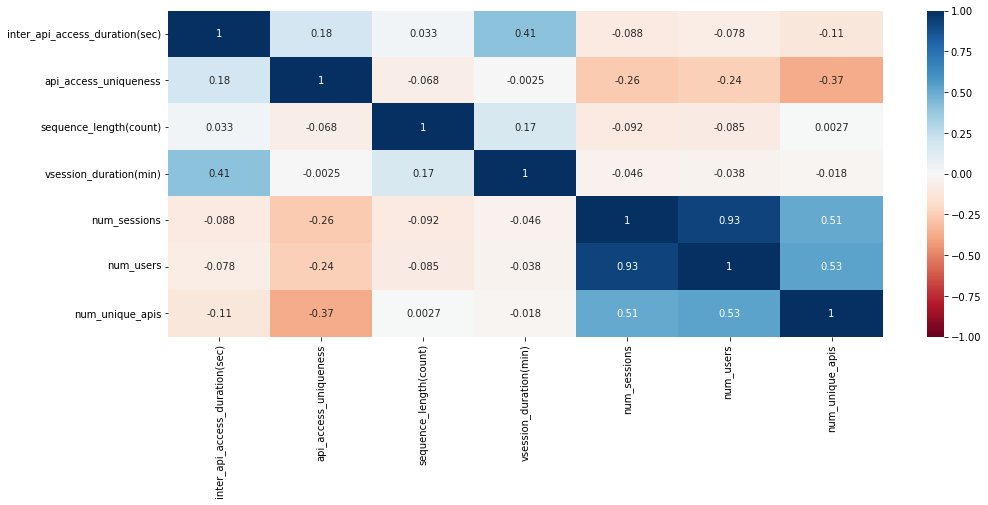

In [80]:
plt.figure(figsize=(16,6))
sns.heatmap(dftidy.corr(),vmin=-1, vmax=1, annot=True,cmap='RdBu')
heatmap.set_title('Correlacion Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

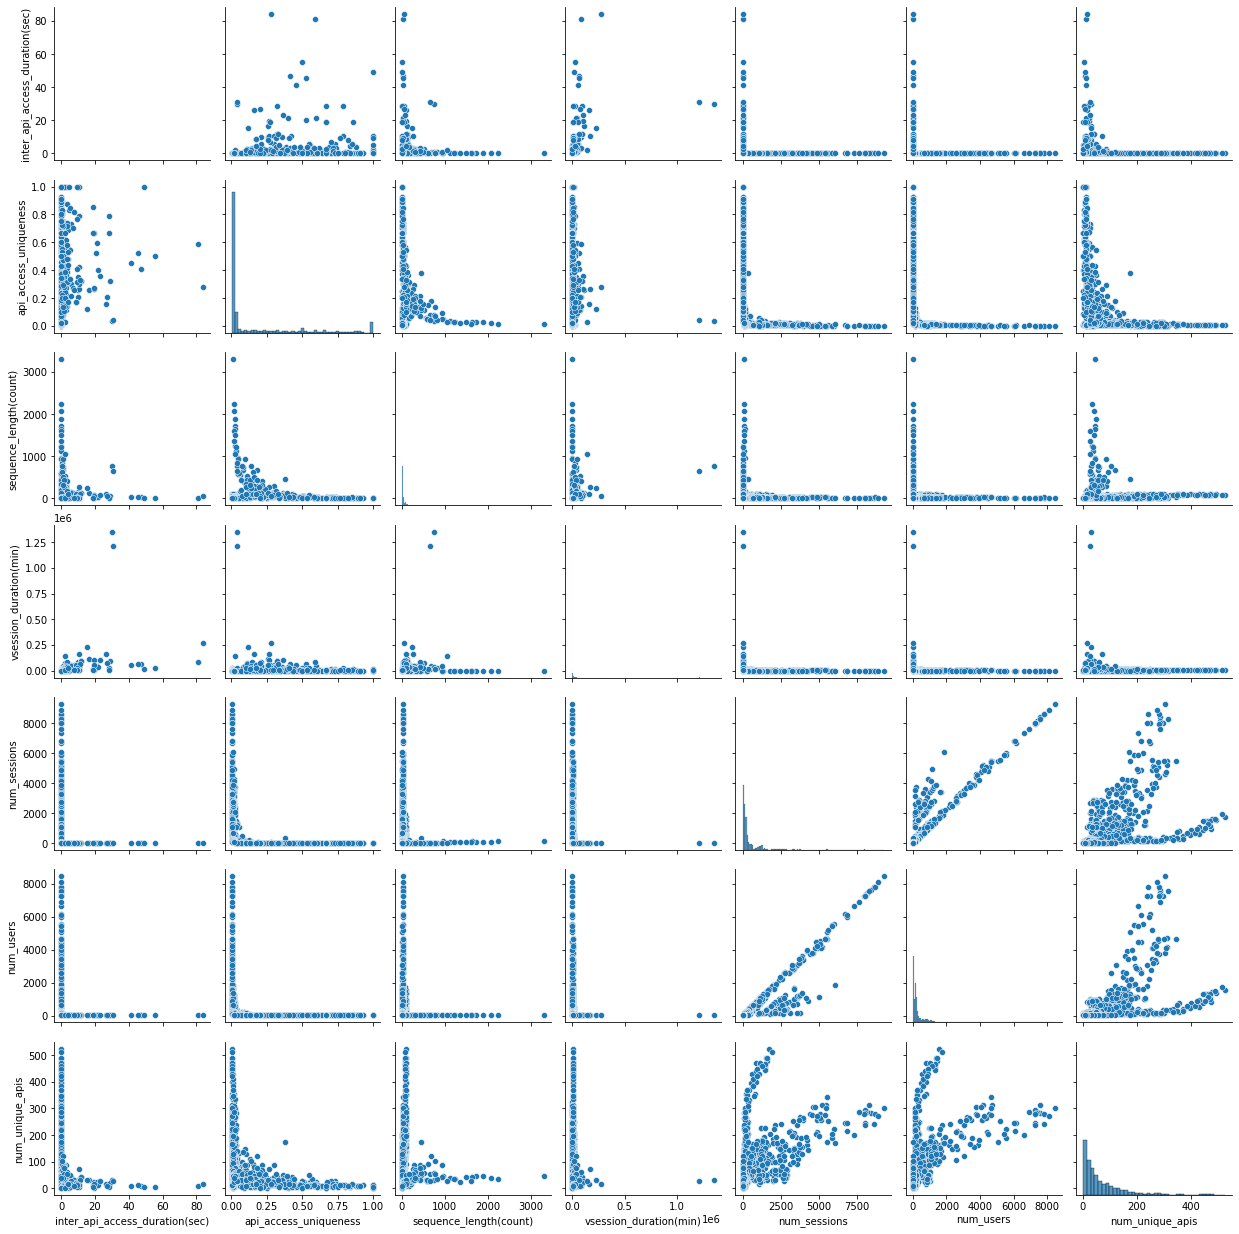

In [81]:
sns.pairplot(dftidy) 
plt.show()

## LOCAL OUTLIER FACTOR

In [94]:
X = dftidy[["num_users", "inter_api_access_duration(sec)"]].to_numpy()
X.shape

(1560, 2)

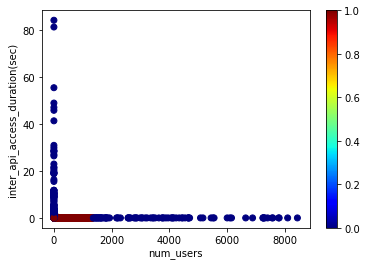

In [110]:
clf = LocalOutlierFactor(n_neighbors=100)
estimado_LOF = clf.fit_predict(X)

plt.scatter(x=X[:,0], y=X[:,1], c=np.where(estimado_LOF > 0.0,1,0), cmap='jet')
#plt.scatter(x=X[:,0], y=X[:,1], c=estimado_LOF, cmap='jet')
plt.xlabel("num_users")
plt.ylabel("inter_api_access_duration(sec)")
plt.colorbar()
plt.show()

In [111]:
np.where(estimado_LOF > 0.0,1,0).mean() 

0.7551282051282051